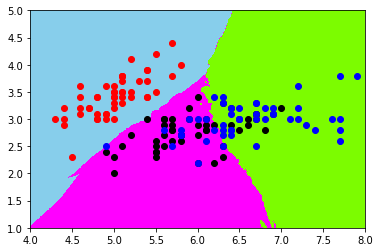

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

#读取鸢尾花数据
iris=load_iris()
#print(iris.DESCR)
x=iris.data #数据集
y=iris.target #真实标签


#定义决策边界输出函数
def descision_boundary(model,axis):
    #reshape(-1,1)将数组转化成一列
    x0,x1=np.meshgrid(np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
                     np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1))
    
    #np.c_  按行连接两个矩阵，就是把两矩阵左右相加
    #ravel()将矩阵向量化\
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_pre=model.predict(x_new)
    z=y_pre.reshape(x0.shape)
    plt.contourf(x0,x1,z,cmap=ListedColormap(['SkyBlue','Magenta','LawnGreen']))
    

knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(x[:,:2],y)
descision_boundary(knn,axis=[4,8,1,5])
plt.scatter(x[y==0,0],x[y==0,1],color='r')
plt.scatter(x[y==1,0],x[y==1,1],color='k')
plt.scatter(x[y==2,0],x[y==2,1],color='b')
plt.show()